In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

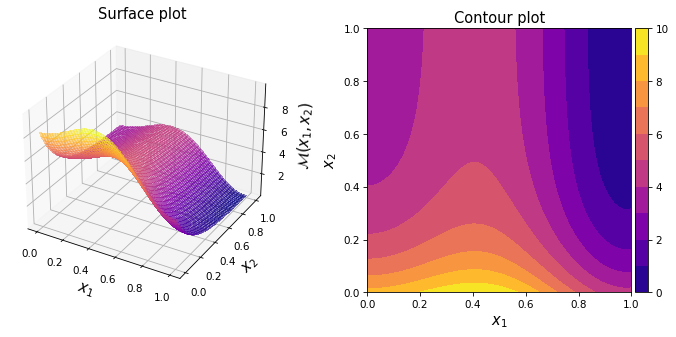

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

my_fun = uqtf.LimNonPoly()

# --- Create 2D data
xx_1d = np.linspace(0.0, 1.0, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1d, xx_1d)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create two-dimensional plots
fig = plt.figure(figsize=(10, 5))

# Surface
axs_1 = plt.subplot(121, projection='3d')
axs_1.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000,1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_1.set_xlabel("$x_1$", fontsize=14)
axs_1.set_ylabel("$x_2$", fontsize=14)
axs_1.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_1.set_title("Surface plot", fontsize=14)

# Contour
axs_2 = plt.subplot(122)
cf = axs_2.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma", levels=10,
)
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_title("Contour plot", fontsize=14)
divider = make_axes_locatable(axs_2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')
axs_2.axis('scaled')

fig.tight_layout(pad=4.0)
plt.gcf().set_dpi(75);
plt.savefig("lim2d.png", dpi=300)